# Generalized Linear Models for Ordinal Data (Example 1)

### Intro and objectives


### In this lab you will learn:
1. examples of generalized linear models
2. how to fit these models in Python


## What I hope you'll get out of this lab
* The feeling that you'll "know where to start" when you need to fit generalized linear models
* Worked Examples
* How to interpret the results obtained

In [1]:
!pip install statsmodels

In [2]:
import statsmodels
statsmodels.__version__

'0.14.4'

In [3]:
!pip install wooldridge

import wooldridge as woo
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
from scipy import stats

from statsmodels.miscmodels.ordinal_model import OrderedModel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 19.3 MB/s eta 0:00:00


# Example.  Will you apply to college ?

#### A study looks at factors that influence the decision of whether to apply to graduate school. College juniors are asked if they are unlikely, somewhat likely, or very likely to apply to graduate school. Hence, our outcome variable has three categories.

#### Data on parental educational status, whether the undergraduate institution is public or private, and current GPA is also collected.

In [4]:
CollegeApplicationDataFrame=pd.read_stata('https://github.com/thousandoaks/M4DS202/blob/main/data/ologit.dta?raw=true')

In [5]:
CollegeApplicationDataFrame.head(10)

,apply,pared,public,gpa
0,very likely,0,0,3.26
1,somewhat likely,1,0,3.21
2,unlikely,1,1,3.94
3,somewhat likely,0,0,2.81
4,somewhat likely,0,0,2.53
5,unlikely,0,1,2.59
6,somewhat likely,0,0,2.56
7,somewhat likely,0,0,2.73
8,unlikely,0,0,3.00
9,somewhat likely,1,0,3.50


In [6]:
CollegeApplicationDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   apply   400 non-null    category
 1   pared   400 non-null    int8    
 2   public  400 non-null    int8    
 3   gpa     400 non-null    float32 
dtypes: category(1), float32(1), int8(2)
memory usage: 3.0 KB


In [7]:
CollegeApplicationDataFrame.groupby('apply').count()

<ipython-input-7-de5d53d87bad>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  CollegeApplicationDataFrame.groupby('apply').count()


,pared,public,gpa
apply,,,
unlikely,220,220,220
somewhat likely,140,140,140
very likely,40,40,40


### 1. Exploratory Data Analysis

<Axes: xlabel='apply', ylabel='gpa'>

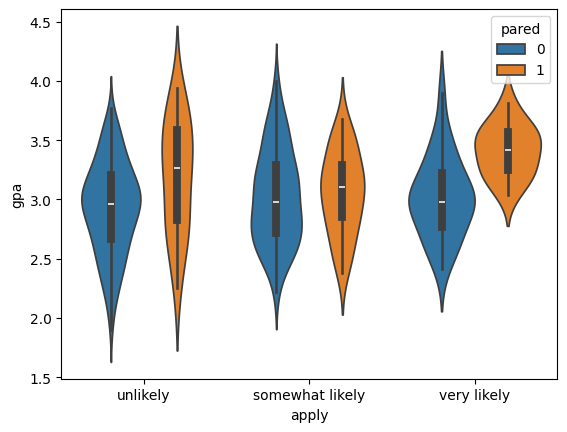

In [8]:
sns.violinplot(data=CollegeApplicationDataFrame,x="apply",y="gpa",hue='pared')

#### The previous figure reveals that larger GPAS lead to higher chances of applying, specially if parents have graduate degrees.

<Axes: xlabel='apply', ylabel='gpa'>

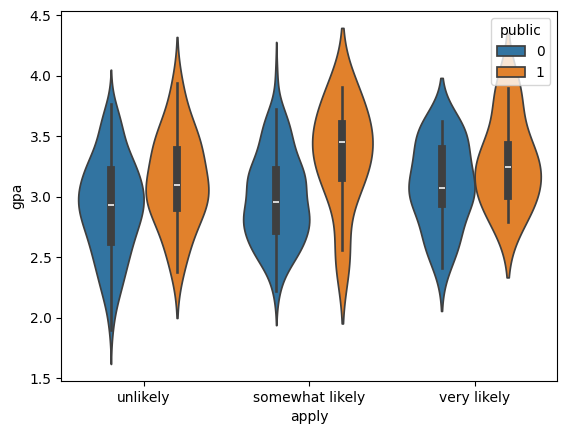

In [9]:
sns.violinplot(data=CollegeApplicationDataFrame,x="apply",y="gpa",hue='public')

## 1. Initial model

#### We will assume that the random variable apply is an ordinal outcome with three categories: "unlikely","somewhat likely","very likely".

####  $P(Y \le j)$ is the cummulative probability of Y less or equal to a specific category: "unlikely","somewhat likely","very likely".

#### The odds of being less or equal a particular category can be defined as:

$\frac{P(Y \le j)}{P(Y> j)}$


#### We assume a logit function, this means that we are assuming that the log odds of the response variable can be modeled as a linear combination of the factors under consideration.

$ logit(P(Y \le j))=\beta_0+\beta_1*x_1+\ldots+\beta_p*X_p $


## 2. Estimation of the parameters

#### Given the ordered nature of the response variable we fit an ordered logit model,

In [11]:
CollegeApplicationDataFrame

,apply,pared,public,gpa
0,very likely,0,0,3.26
1,somewhat likely,1,0,3.21
2,unlikely,1,1,3.94
3,somewhat likely,0,0,2.81
4,somewhat likely,0,0,2.53
...,...,...,...,...
395,unlikely,0,0,3.70
396,unlikely,0,0,2.63
397,somewhat likely,0,0,2.25
398,somewhat likely,0,0,3.26


In [12]:
reg_1 = OrderedModel.from_formula("apply ~ pared + public + gpa", CollegeApplicationDataFrame,
                                      distr='logit')
results = reg_1.fit(method='bfgs')
results.summary()




Optimization terminated successfully.
         Current function value: 0.896281
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                  apply   Log-Likelihood:                -358.51
Model:                   OrderedModel   AIC:                             727.0
Method:            Maximum Likelihood   BIC:                             747.0
Date:                Tue, 08 Oct 2024                                         
Time:                        05:21:19                                         
No. Observations:                 400                                         
Df Residuals:                     395                                         
Df Model:                           3                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
pared                           1.0476      0.266      3.942      0.000       0.527       1.569
public                         -0.0586      0.298     -0.197      0.844      -0.642       0.525
gpa                             0.6158      0.261      2.363      0.018       0.105       1.127
unlikely/somewhat likely        2.2035      0.780      2.827      0.005       0.676       3.731
somewhat likely/very likely     0.7398      0.080      9.236      0.000       0.583       0.897
===============================================================================================
"""

#### In the case of ordinal responses it is easier to interpret the results in terms of odds ratios, rather than log of odds ratios

#### We compute the exponential of the coefficients

In [13]:
np.exp(results.params)

,0
pared,2.850901
public,0.943077
gpa,1.851167
unlikely/somewhat likely,9.057094
somewhat likely/very likely,2.095426


## 3. Model interpretation:

#### Based on the previous results.

#### 1. For students whose parents did attend college, the odds of being more likely to apply is 2.85 times that of students whose parents did not go to college, holding constant all other variables.

#### 2. For students in public school, the odds of being more likely to apply is 0.95 times than private school students, holding constant all other variables. This means that students from public schools are less likely to apply to college than their private counterparts.

#### 3. For every one unit increase in student’s GPA the odds of being more likely to apply is 1.85 times larger (i.e., increases 85%), holding constant all other variables.





###4. Ex-post Analysis

#### based on the results of the  model we conclude that higher GPAs, parents with education and having studied in a private school increase the odds of applying to college.

In [16]:
CollegeApplicationDataFrame.columns.values

array(['apply', 'pared', 'public', 'gpa'], dtype=object)

In [17]:
X=CollegeApplicationDataFrame[['pared', 'public','gpa']]





In [18]:
Y_predicted=results.predict(X)
Y_predicted.rename(columns={0:"Unlikely",1:"SomewhatLikely",2:"VeryLikely"},inplace=True)

In [19]:
Y_predicted

,Unlikely,SomewhatLikely,VeryLikely
0,0.548841,0.359323,0.091837
1,0.305582,0.475942,0.218476
2,0.229384,0.478191,0.292426
3,0.616118,0.312690,0.071191
4,0.656003,0.283398,0.060599
...,...,...,...
395,0.481266,0.401662,0.117072
396,0.641976,0.293823,0.064201
397,0.693804,0.254701,0.051496
398,0.548841,0.359323,0.091837


In [20]:
CollegeApplicationDataFramePredictions=pd.concat([X,Y_predicted],axis=1)

In [21]:
CollegeApplicationDataFramePredictions

,pared,public,gpa,Unlikely,SomewhatLikely,VeryLikely
0,0,0,3.26,0.548841,0.359323,0.091837
1,1,0,3.21,0.305582,0.475942,0.218476
2,1,1,3.94,0.229384,0.478191,0.292426
3,0,0,2.81,0.616118,0.312690,0.071191
4,0,0,2.53,0.656003,0.283398,0.060599
...,...,...,...,...,...,...
395,0,0,3.70,0.481266,0.401662,0.117072
396,0,0,2.63,0.641976,0.293823,0.064201
397,0,0,2.25,0.693804,0.254701,0.051496
398,0,0,3.26,0.548841,0.359323,0.091837


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


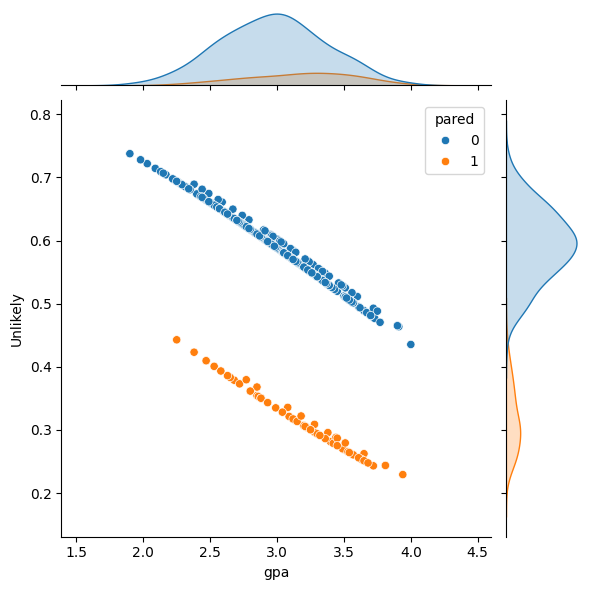

In [22]:
sns.jointplot(data=CollegeApplicationDataFramePredictions, x='gpa',y='Unlikely',hue='pared')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


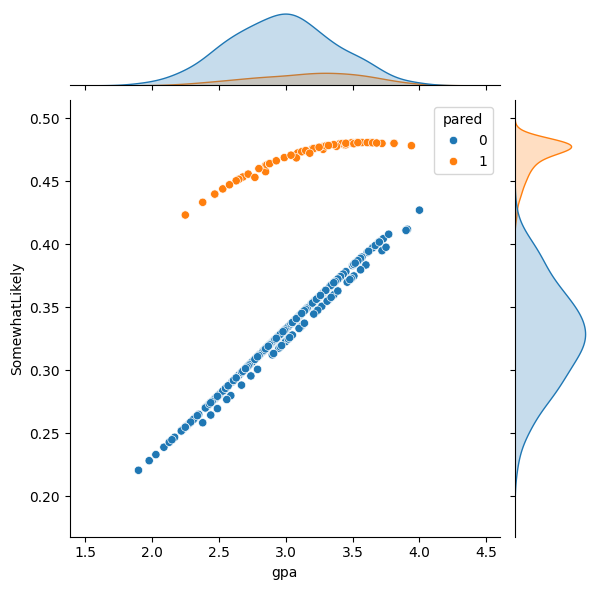

In [23]:
sns.jointplot(data=CollegeApplicationDataFramePredictions, x='gpa',y='SomewhatLikely',hue='pared')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


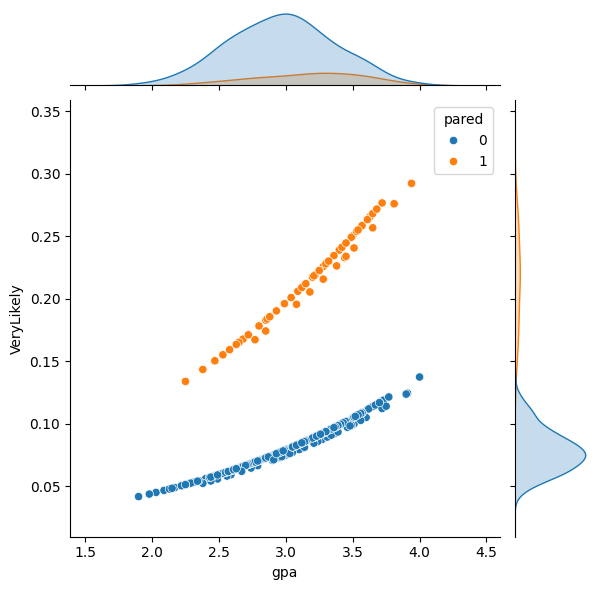

In [24]:
sns.jointplot(data=CollegeApplicationDataFramePredictions, x='gpa',y='VeryLikely',hue='pared')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


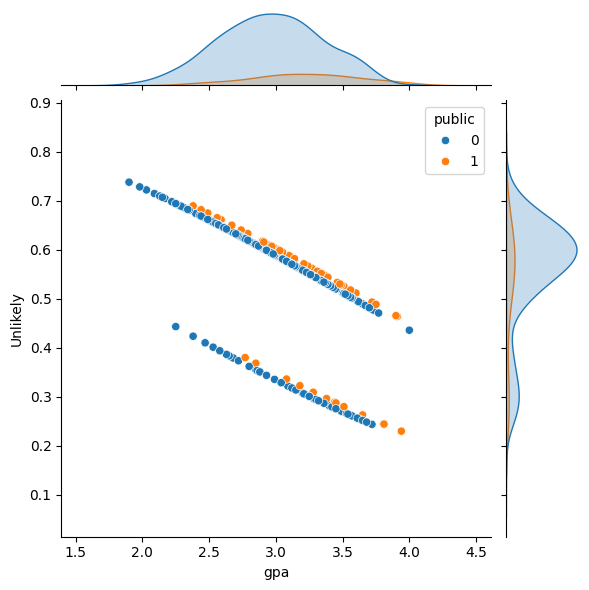

In [25]:
sns.jointplot(data=CollegeApplicationDataFramePredictions, x='gpa',y='Unlikely',hue='public')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


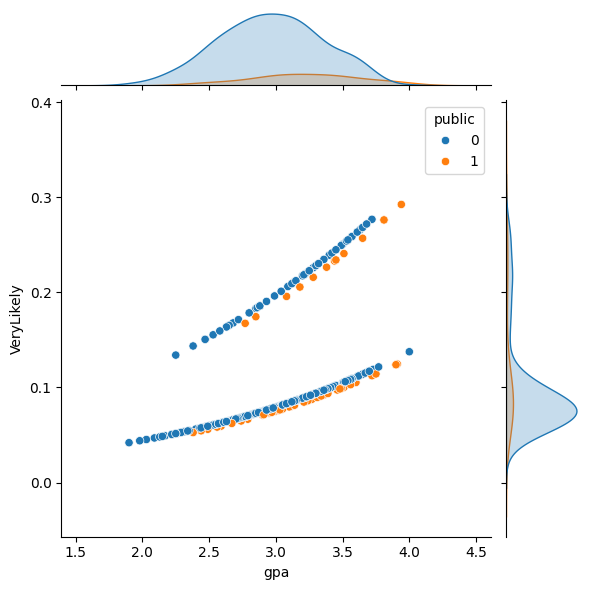

In [26]:
sns.jointplot(data=CollegeApplicationDataFramePredictions, x='gpa',y='VeryLikely',hue='public')